In [43]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy.stats import pearsonr
from scipy import stats

In [44]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [45]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


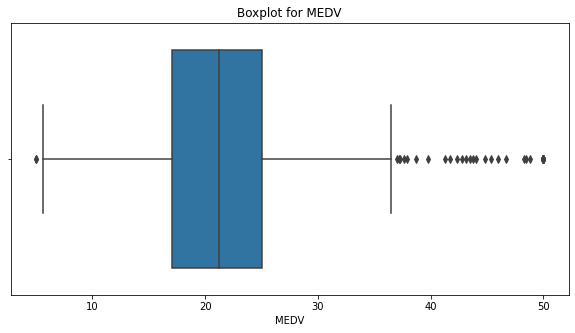

In [46]:
#For the "Median value of owner-occupied homes" provide a boxplot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


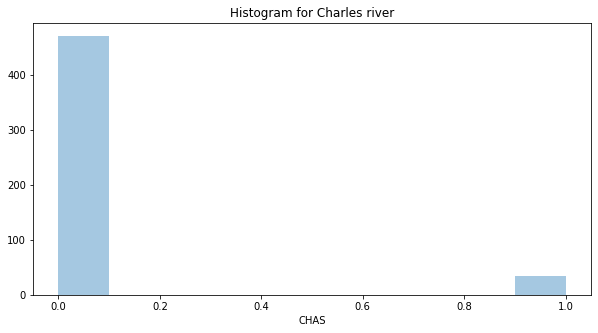

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
plt.title("Histogram for Charles river")
plt.show()

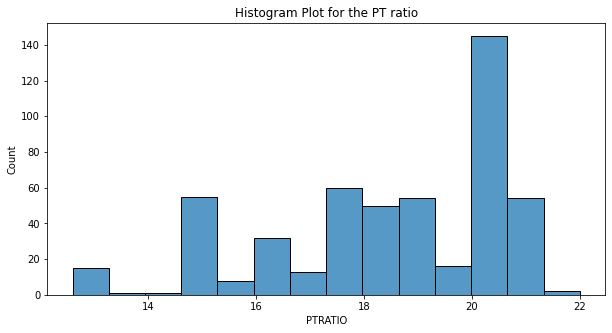

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(data=boston_df, x="PTRATIO")
plt.title("Histogram Plot for the PT ratio")
plt.show()

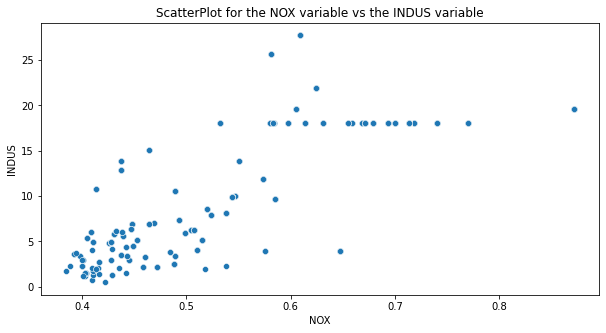

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=boston_df, x="NOX", y="INDUS")
plt.title("ScatterPlot for the NOX variable vs the INDUS variable")
plt.show()

In [50]:
list1 = boston_df['NOX']
list2 = boston_df['INDUS'] 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
print('From the above firgure, it can be seen that NOX and INDUS are correlated')

Pearsons correlation: 0.764
From the above firgure, it can be seen that NOX and INDUS are correlated


In [51]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

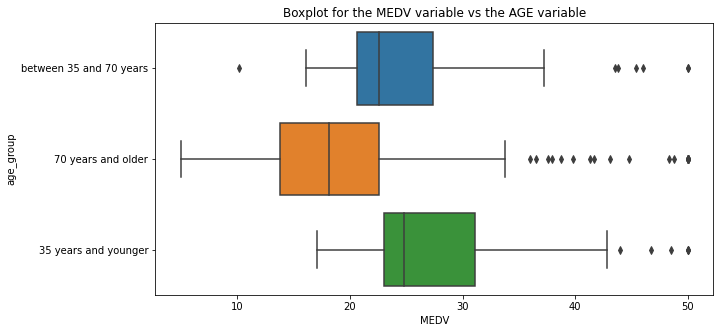

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**



In [54]:
rvs1=boston_df.loc[(boston_df['CHAS'] ==1),'MEDV']
rvs2=boston_df.loc[(boston_df['CHAS'] ==0),'MEDV']
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Null Hypothesis(): Both average MEDV are the same

Alternative Hypothesis(): Both average MEDV are NOT the same

Since alpha =0.05 and the pvalue  < alpha. Therefore, the we reject NULL hypothesis



**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [64]:
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]
stats.f_oneway(low, mid, high)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Th null hypothesis is the hypothesis that all age groups have same mean MEDV values. Because the pvalue < alpha, therefore, the NULL hypothesis is rejected.

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

In [67]:
NOX_data=boston_df['NOX']
INDUS_data=boston_df['INDUS']
res = stats.pearsonr(NOX_data,INDUS_data )
res

(0.7636514469209151, 7.913361061238693e-98)

The Null hypothesis is that there is no relationship between NOX and INDUS variable. However, the pvalue < alpha. Therefore, the NULL hypothesis is rejected. This can also be conlcuded from scateerplot plot

**What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [70]:
x=boston_df['DIS']
y=boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.21e-08
Time:                        09:23:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 **The DIS parameter add 1.0916 units more than average to MEDV**